In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [13]:
from swag.posteriors._assess_dimension import _infer_dimension_
from swag.posteriors.subspaces import FreqDirSpace

In [14]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.decomposition.pca import _assess_dimension_

In [15]:
# Minka's generative model
def gen_data(N = 60, d = 100, signal=100, snr = 10):
    #var = np.array([10, 8., 6., 4., 2.])
    var = np.random.randn(signal) * snr
    var = np.concatenate([np.abs(var), np.repeat(a=0.25, repeats=d - len(var), axis = 0)])
    
    dist = np.random.multivariate_normal(np.zeros(d), np.diag(var), N)
    return dist

In [5]:
def simulate_n_x(reps = 100, N=100, d=50, signal=10, snr=10):
    pen_ppca, ppca, fd_ppca = np.zeros(reps), np.zeros(reps), np.zeros(reps)
    for i in range(reps):
        if i%10 is 0:
            print('Trial: ', i)
        data = gen_data(N, d, signal, snr)
        
        freqdir_space = FreqDirSpace(d, max_rank = int(d/10))
        tr_sigma = np.min([np.diag(np.cov(data)).sum(), np.diag(np.cov(data.T)).sum()])
        
        for row in data:
            freqdir_space.collect_vector(torch.FloatTensor(row))
            fd_ll_max = freqdir_space._infer_dimension_(tr_sigma)
            #print(fd_ll_max)
        if d >= N or max(data.shape) > 500:
            pca = PCA(n_components=d)
        else:
            pca = PCA(n_components='mle')
        pca.fit(data)
        
        _, s, _ = np.linalg.svd(data)
        

        eigs = s**2 / N
        ll = np.zeros(len(eigs))
        correction = np.zeros(len(eigs))
        # compute minka's PCA marginal log likelihood and the correction term
        for rank in range(len(eigs)):
            # add a secondary correction term based on the rank of the matrix + degrees of freedom
            m = max(data.shape) * rank - rank * (rank + 1) / 2.
            correction[rank] = 0.5 * m * np.log(min(data.shape))
            ll[rank] = _assess_dimension_(spectrum=eigs, rank=rank, 
                            n_features=min(data.shape), n_samples=max(data.shape))
        #pca.fit(data)
        ppca[i] = np.argmax(ll) + 1
        pen_ppca[i] = np.argmax(ll - correction) + 1
        
        #ppca[i] = sklearn_infer_dimension(pca.singular_values_**2., n_features=d, n_samples=N)
        
        
        pca2.fit(data)

        ll_max, ll, vhat = _infer_dimension_(pca2.explained_variance_, 
                                             tr_sigma=tr_sigma, n_samples=N, n_features=d)
        pen_ppca[i] = ll_max
       

        fd_ppca[i] = fd_ll_max
        
    return pen_ppca, ppca, fd_ppca

In [6]:
lowd_pen_ppca, lowd_ppca, lowd_fd_ppca = simulate_n_x(100, 100, 50, signal=5)

Trial:  0


/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/subspaces.py:182: RuntimeWarning: divide by zero encountered in true_divide
  fd_eigs = np.diag(fd_a @ fd_a.T) / (self.num_models.item() - 1)
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:49: RuntimeWarning: invalid value encountered in log
  pv = -np.log(v) * n_samples * (n_features - rank) / 2.
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:62: RuntimeWarning: invalid value encountered in log
  (1. / spectrum_[j] - 1. / spectrum_[i])) + np.log(n_samples)


Trial:  10
Trial:  20
Trial:  30
Trial:  40
Trial:  50
Trial:  60
Trial:  70
Trial:  80
Trial:  90


4.41 1.209090567327361
4.73 0.5070502933634887
2.9 1.161895003862225


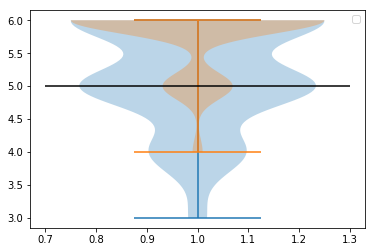

In [7]:
print( np.mean(lowd_pen_ppca), np.std(lowd_pen_ppca) )
print( np.mean(lowd_ppca), np.std(lowd_ppca) )
print( np.mean(lowd_fd_ppca), np.std(lowd_fd_ppca) )

In [8]:
print( np.mean(lowd_pen_ppca), np.std(lowd_pen_ppca) )
print( np.mean(lowd_ppca), np.std(lowd_ppca) )

0.23
0.76


In [9]:
highd_pen_ppca, highd_ppca, highd_fd_ppca = simulate_n_x(100, 60, 100, signal=10)

Trial:  0


/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/subspaces.py:182: RuntimeWarning: divide by zero encountered in true_divide
  fd_eigs = np.diag(fd_a @ fd_a.T) / (self.num_models.item() - 1)
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:49: RuntimeWarning: invalid value encountered in log
  pv = -np.log(v) * n_samples * (n_features - rank) / 2.
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:62: RuntimeWarning: invalid value encountered in log
  (1. / spectrum_[j] - 1. / spectrum_[i])) + np.log(n_samples)


Trial:  10
Trial:  20
Trial:  30
Trial:  40
Trial:  50
Trial:  60
Trial:  70
Trial:  80
Trial:  90


In [10]:
print( np.mean(highd_pen_ppca), np.std(highd_pen_ppca) )
print( np.mean(highd_ppca), np.std(highd_ppca) )
print( np.mean(highd_fd_ppca), np.std(highd_fd_ppca) )

4.71 0.6825686778632609
59.0 0.0
6.59 1.4428790663115187


In [11]:
print( np.mean(highd_pen_ppca == 20) )
print( np.mean(highd_ppca == 20))

0.54
0.0


In [13]:
vhighd_pen_ppca, vhighd_ppca, vhighd_fd_ppca = simulate_n_x(20, N=4000, d=500, signal=20, snr = 100)

Trial:  0


/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/subspaces.py:182: RuntimeWarning: divide by zero encountered in true_divide
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:49: RuntimeWarning: invalid value encountered in log
  pv = -np.log(v) * n_samples * (n_features - rank) / 2.
/home/wesley/Documents/Code/private_swa_uncertainties/swag/posteriors/_assess_dimension.py:62: RuntimeWarning: invalid value encountered in log
  (1. / spectrum_[j] - 1. / spectrum_[i])) + np.log(n_samples)


Trial:  10


In [ ]:
print( np.mean(vhighd_pen_ppca), np.std(vhighd_pen_ppca) )
print( np.mean(vhighd_ppca), np.std(vhighd_ppca) )
print( np.mean(vhighd_fd_ppca), np.std(vhighd_fd_ppca) )

In [ ]:
#vhighd_pen_ppca, vhighd_ppca = simulate_n_x(10, N=1000, d=10000, signal=100, snr = 100)

In [ ]:
#print( np.mean(vhighd_pen_ppca), np.std(vhighd_pen_ppca) )
#print( np.mean(vhighd_ppca), np.std(vhighd_ppca) )

In [16]:
np.savez(file='pen_pca_tests.npz',
    lowd_pen_ppca=lowd_pen_ppca, lowd_ppca=lowd_ppca, lowd_fd_ppca=lowd_fd_ppca,
    highd_pen_ppca=highd_pen_ppca, highd_ppca=highd_ppca, highd_fd_ppca=highd_fd_ppca,
      vhighd_pen_ppca=vhighd_pen_ppca, vhighd_ppca=vhighd_ppca, vhighd_fd_ppca=vhighd_fd_ppca
)